In [2]:
library(Seurat)
library(cowplot)
library(slingshot)
library(grDevices)
library(RColorBrewer)
library(tradeSeq)

# read data

In [4]:
data = readRDS('/public21/home/sc90258/huangying/analysis/1.Aedes_scRNA-Seq/20231103_Aedes_midgut.2sp_rerun/scRNA_analysis/merge_2022-23_scdata/5.marker.seurat_obj.rds')

data[['CellName']] <- colnames(data)

data

An object of class Seurat 
13901 features across 7445 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

{13: 'ISC/EB-p',
9: 'ISC/EB-m',
10: 'ISC/EB-d',
11: 'EC-Na',
14: 'EC-AA',
4: 'EC-Trypsin 5G1',
5: 'EC-Trypsin 5G1',
2: 'EC-Trypsin 5G1',
0: 'EC',
1: 'EC',
3: 'EC',
8: 'EC',
7: 'EC-S',
12: 'EE',
6: 'VM',
15: 'Unkn'}

# get EC and ISC

In [5]:
info = data@meta.data
info_use = subset(
    info, 
    !(info$seurat_clusters %in% c(6, 10, 12)) & ((info$DF.classifications_0.25_0.09_181 == 'Singlet') | (info$DF.classifications_0.25_0.09_117 == 'Singlet'))
)
dim(info_use)

[1] 6757   12

In [6]:
data_use = subset(data, subset= CellName %in% rownames(info_use))
data_use

An object of class Seurat 
13901 features across 6757 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [7]:
write.csv(data_use@meta.data, file = "./seurat.meta_data.csv", append = FALSE, quote = TRUE, sep = ",")

Warning message in write.csv(data_use@meta.data, file = "./seurat.meta_data.csv", :
“attempt to set 'append' ignored”
Warning message in write.csv(data_use@meta.data, file = "./seurat.meta_data.csv", :
“attempt to set 'sep' ignored”


In [9]:
data_use@meta.data[['celltype']] = read.csv('./seurat.meta_data.mark_celltype.csv', sep=',')[['celltype']]
data_use@meta.data[['celltype_id']] = read.csv('./seurat.meta_data.mark_celltype.csv', sep=',')[['celltype_id']]
data_use@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.9,seurat_clusters,pANN_0.25_0.09_181,DF.classifications_0.25_0.09_181,pANN_0.25_0.09_117,DF.classifications_0.25_0.09_117,integrated_snn_res.0.5,CellName,celltype,celltype_id
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<dbl>,<chr>,<fct>,<chr>,<chr>,<int>
AAACCCAAGACTGTTC-1_1,Aedes_midgut,543,158,24.055944,0,1,0.007352941,Singlet,NA,NA,1,AAACCCAAGACTGTTC-1_1,EC-trypsin 5G1,9
AAACCCACAACACGTT-1_1,Aedes_midgut,5941,626,10.658449,0,3,0.273897059,Singlet,NA,NA,3,AAACCCACAACACGTT-1_1,EC-1,6
AAACCCACACCTGTCT-1_1,Aedes_midgut,430,180,29.623568,2,5,0.079044118,Singlet,NA,NA,5,AAACCCACACCTGTCT-1_1,ISC/EB-d2,4
AAACCCACATTGACAC-1_1,Aedes_midgut,15243,1488,6.951480,4,3,0.373161765,Singlet,NA,NA,3,AAACCCACATTGACAC-1_1,EC-1,6
AAACGAAAGACTTCGT-1_1,Aedes_midgut,4307,592,21.861393,4,2,0.306985294,Singlet,NA,NA,2,AAACGAAAGACTTCGT-1_1,EC-2,2
AAACGAAAGGGCGAAG-1_1,Aedes_midgut,499,164,16.134454,1,0,0.012867647,Singlet,NA,NA,0,AAACGAAAGGGCGAAG-1_1,EC-3,0
AAACGAACAACCTAAC-1_1,Aedes_midgut,415,134,22.388060,7,0,0.001838235,Singlet,NA,NA,0,AAACGAACAACCTAAC-1_1,EC-3,0
AAACGAAGTAATGCTC-1_1,Aedes_midgut,865,213,28.923583,1,0,0.027573529,Singlet,NA,NA,0,AAACGAAGTAATGCTC-1_1,EC-3,0
AAACGAAGTATCCCAA-1_1,Aedes_midgut,378,126,29.608939,1,0,0.001838235,Singlet,NA,NA,0,AAACGAAGTATCCCAA-1_1,EC-3,0


In [10]:
unique(data_use@meta.data$celltype)

[1] "EC-trypsin 5G1" "EC-1"           "ISC/EB-d2"      "EC-2"          
 [5] "EC-3"           "EC-im"          "ISC/EB-d1"      "ISC/EB-q"      
 [9] "ISC/EB"         "EC-AA"

In [11]:
saveRDS(data_use, './data_use.rds')

## UMAP

In [16]:
clusters = data_use$celltype_id
sce <- as.SingleCellExperiment(data_use)

sce <- slingshot(sce, clusterLabels = clusters, reducedDim = "UMAP",
                      allow.breaks = FALSE, start.clus="1")

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames =

In [17]:
saveRDS(sce, './sce.slingshot_umap.rds')

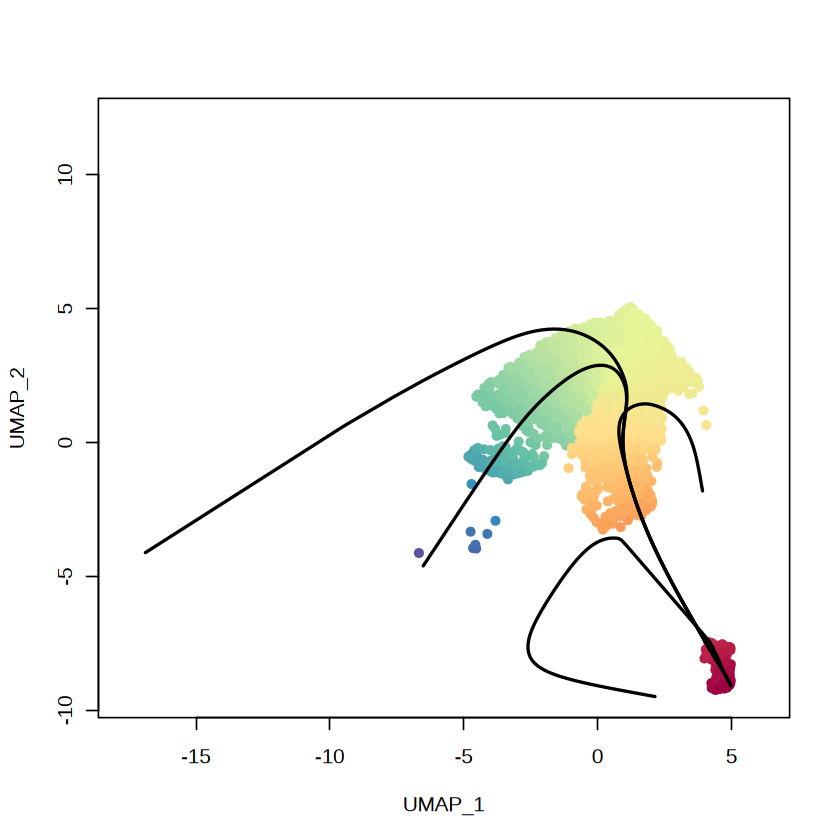

In [18]:
colors <- colorRampPalette(brewer.pal(11,'Spectral')[-6])(100)
plotcol <- colors[cut(sce$slingPseudotime_1, breaks=100)]

plot(reducedDims(sce)$UMAP, col = plotcol, pch=16, asp = 1)
lines(SlingshotDataSet(sce), lwd=2, col='black')

In [19]:
SlingshotDataSet(sce)

class: SlingshotDataSet 

 Samples Dimensions
    6757          2

lineages: 4 
Lineage1: 1  4  2  9  6  7  
Lineage2: 1  4  2  9  6  5  
Lineage3: 1  4  2  0  
Lineage4: 1  4  3  8  

curves: 4 
Curve1: Length: 23.663	Samples: 3016.18
Curve2: Length: 33.361	Samples: 3257.51
Curve3: Length: 16.316	Samples: 3092.33
Curve4: Length: 17.961	Samples: 1146.69

# diff genes among linkage

In [22]:
counts <- as.matrix(data_use@assays$RNA@counts)

In [23]:
# Removing some genes to speed up the computations for this tutorial
filt_counts <- counts[rowSums(counts > 5) > ncol(counts)/100, ]
dim(filt_counts)

[1]  526 6757

In [25]:
system('sbatch ./diff.sbatch.sh', intern=TRUE)

[1] "Submitted batch job 2917775"

In [ ]:
# sce_diff <- fitGAM(counts = as.matrix(filt_counts), sds = SlingshotDataSet(sce_pca))

In [26]:
sce_diff = readRDS('./sce_diff.rds')

In [27]:
pseudotime_association <- associationTest(sce_diff)
pseudotime_association$fdr <- p.adjust(pseudotime_association$pvalue, method = "fdr")
pseudotime_association <- pseudotime_association[order(pseudotime_association$pvalue), ]
pseudotime_association$feature_id <- rownames(pseudotime_association)

In [28]:
pseudotime_association$pvalue

[1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [6] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [11] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [31] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [36] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [41] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [46] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [51] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [56] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [61] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [66] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [71] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [76] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [81] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [86] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [91] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [96] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[101] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[106] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[111] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[116] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[121] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[126] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[131] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[136] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[141] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[146] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[151] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[156] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[161] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[166] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[171] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[176] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[181] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[186] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[191] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[196] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[201] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[206] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[211] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[216] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[221] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[226] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[231] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[236] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[241] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[246] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[251] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[256] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[261] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[266] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[271] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[276] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[281] 0.000000e+00 0.00000

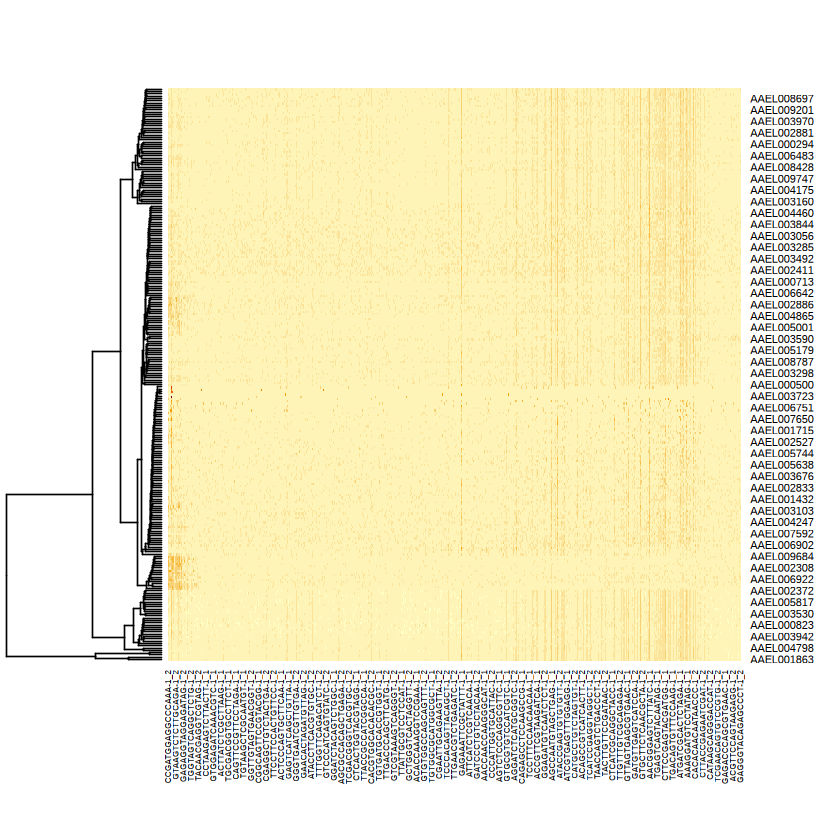

In [29]:
topgenes <- rownames(pseudotime_association[order(pseudotime_association$pvalue), ])[1:250]
pst.ord <- order(sce$slingPseudotime_1, na.last = NA)
heatdata <- counts[topgenes, pst.ord]
heatclus <- data_use$celltype_id[pst.ord]

heatmap(log1p(heatdata), Colv = NA,
        # ColSideColors = brewer.pal(9,"Set1")[heatclus]
)

In [30]:
write.csv(pseudotime_association, 'sce_diff.genes.csv')
pseudotime_association

,waldStat,df,pvalue,meanLogFC,fdr,feature_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AAEL000269,947.9085,19,0,1.1661940,0,AAEL000269
AAEL000291,2056.1699,19,0,3.5854873,0,AAEL000291
AAEL000294,2437.8490,19,0,2.4017436,0,AAEL000294
AAEL000417,1337.6442,19,0,2.6334322,0,AAEL000417
AAEL000424,749.0525,19,0,1.4484809,0,AAEL000424
AAEL000428,1413.4845,19,0,2.6072954,0,AAEL000428
AAEL000486,206.3798,19,0,0.8369408,0,AAEL000486
AAEL000500,1998.7978,19,0,13.9664007,0,AAEL000500
AAEL000516,296.2264,19,0,3.1345053,0,AAEL000516


In [31]:
sce@colData[c('slingPseudotime_1', 'slingPseudotime_2', 'slingPseudotime_3', 'slingPseudotime_4')]

DataFrame with 6757 rows and 4 columns
                     slingPseudotime_1 slingPseudotime_2 slingPseudotime_3
                             <numeric>         <numeric>         <numeric>
AAACCCAAGACTGTTC-1_1           12.0798           12.1617                NA
AAACCCACAACACGTT-1_1           15.8011                NA                NA
AAACCCACACCTGTCT-1_1                NA                NA                NA
AAACCCACATTGACAC-1_1                NA           18.1958                NA
AAACGAAAGACTTCGT-1_1           14.6838                NA                NA
...                                ...               ...               ...
TTTGATCCAGTGGCTC-1_2                NA                NA           14.2873
TTTGATCTCATGTCAG-1_2                NA                NA           13.3185
TTTGGAGCAATCGAAA-1_2           12.4687           12.2673           11.2642
TTTGGAGGTTCCTACC-1_2           18.6426                NA                NA
TTTGGTTCAGACATCT-1_2           10.5239           10.5641     

In [33]:
write.csv(sce@colData[c('slingPseudotime_1', 'slingPseudotime_2', 'slingPseudotime_3', 'slingPseudotime_4')], './sce_pca.pseudotime.csv')

In [34]:
different_early_association <- earlyDETest(sce_diff)
different_early_association$feature_id <- rownames(different_early_association)

In [35]:
different_early_association

,waldStat,df,pvalue,fcMedian,feature_id
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AAEL000010,71.2034890,14,1.167500e-09,0.5141075,AAEL000010
AAEL000032,137.3673125,13,0.000000e+00,0.3248205,AAEL000032
AAEL000182,23.3581792,7,1.476190e-03,1.7503078,AAEL000182
AAEL000185,79.8835550,13,1.160361e-11,0.9269355,AAEL000185
AAEL000269,78.1778144,15,1.501849e-10,0.4116289,AAEL000269
AAEL000291,605.4408677,15,0.000000e+00,1.0133422,AAEL000291
AAEL000294,838.2937022,15,0.000000e+00,1.1449551,AAEL000294
AAEL000417,836.5718933,16,0.000000e+00,1.0044758,AAEL000417
AAEL000424,329.6143896,16,0.000000e+00,0.8106628,AAEL000424


In [36]:
write.csv(different_early_association, 'diff.early.csv')

In [37]:
egenes = c('AAEL015110', 'AAEL003039', 'AAEL006115', 'AAEL027050', 'AAEL005455')

In [38]:
counts[egenes,]

,AAACCCAAGACTGTTC-1_1,AAACCCACAACACGTT-1_1,AAACCCACACCTGTCT-1_1,AAACCCACATTGACAC-1_1,AAACGAAAGACTTCGT-1_1,AAACGAAAGGGCGAAG-1_1,AAACGAACAACCTAAC-1_1,AAACGAAGTAATGCTC-1_1,AAACGAAGTATCCCAA-1_1,AAACGAAGTTCGCGTG-1_1,⋯,TTTGACTAGAGGTATT-1_2,TTTGACTCAGCGTACC-1_2,TTTGACTGTTGGGCCT-1_2,TTTGACTTCGCCTCTA-1_2,TTTGATCAGTGTGTTC-1_2,TTTGATCCAGTGGCTC-1_2,TTTGATCTCATGTCAG-1_2,TTTGGAGCAATCGAAA-1_2,TTTGGAGGTTCCTACC-1_2,TTTGGTTCAGACATCT-1_2
AAEL015110,1,1,0,2,0,0,1,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1
AAEL003039,0,0,0,1,0,0,0,0,1,0,⋯,0,0,0,0,2,0,0,0,0,0
AAEL006115,0,1,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
AAEL027050,0,1,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAEL005455,0,1,0,5,3,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0


In [39]:
write.csv(counts[egenes,], 'diff.early_top5.rdc.csv')